
# Importing Libraries


In [419]:
!pip install nltk

In [420]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import string
import nltk
from nltk.corpus import stopwords






# Data Analysis



In [536]:
data=pd.read_csv("train.csv",encoding="utf-8")
test=pd.read_csv("test.csv",encoding="utf-8")


data.isnull().sum()

Description                          0
Commenting                           0
Ogling/Facial Expressions/Staring    0
Touching /Groping                    0
dtype: int64

In [422]:
data.head()


,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [423]:
# 0-NO
# 1-YES

data['Commenting'].value_counts()

0    4381
1    2820
Name: Commenting, dtype: int64

In [424]:
# 0-NO
# 1-YES

data['Ogling/Facial Expressions/Staring'].value_counts()

0    5675
1    1526
Name: Ogling/Facial Expressions/Staring, dtype: int64

In [425]:
# 0-NO
# 1-YES

data['Touching /Groping'].value_counts()

0    5035
1    2166
Name: Touching /Groping, dtype: int64

# Data Preprocessing

In [426]:
data.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping
0,"Was walking along crowded street, holding mums...",0,0,1
1,This incident took place in the evening.I was ...,0,1,0
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0
3,Incident happened inside the train,0,0,0
4,I witnessed an incident when a chain was bruta...,0,0,0


In [427]:
data["Clean_Description"] = data["Description"].str.lower()
data.head()


,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping,Clean_Description
0,"Was walking along crowded street, holding mums...",0,0,1,"was walking along crowded street, holding mums..."
1,This incident took place in the evening.I was ...,0,1,0,this incident took place in the evening.i was ...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,i was waiting for the bus. a man came on a bik...
3,Incident happened inside the train,0,0,0,incident happened inside the train
4,I witnessed an incident when a chain was bruta...,0,0,0,i witnessed an incident when a chain was bruta...


In [428]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["Clean_Description"] = data["Clean_Description"].apply(lambda text: remove_stopwords(text))
data.head()

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping,Clean_Description
0,"Was walking along crowded street, holding mums...",0,0,1,"walking along crowded street, holding mums han..."
1,This incident took place in the evening.I was ...,0,1,0,incident took place evening.i metro two guys s...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,waiting bus. man came bike offering liftvto yo...
3,Incident happened inside the train,0,0,0,incident happened inside train
4,I witnessed an incident when a chain was bruta...,0,0,0,witnessed incident chain brutally snatched eld...


# Data Visualization

<bound method Axes.set of <Axes: xlabel='Commenting', ylabel='count'>>

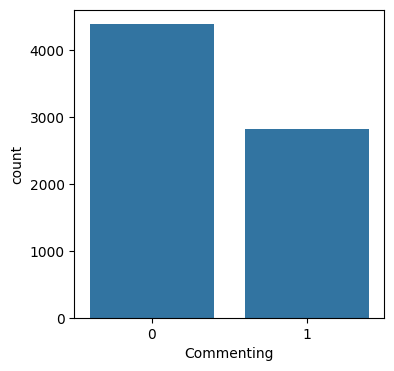

In [429]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x='Commenting',data=data,ax=ax).set

<Axes: xlabel='Ogling/Facial Expressions/Staring', ylabel='count'>

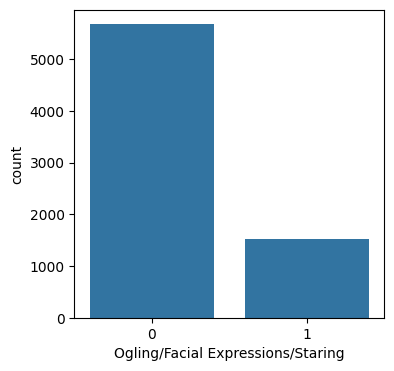

In [430]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x='Ogling/Facial Expressions/Staring',data=data,ax=ax)

<Axes: xlabel='Touching /Groping', ylabel='count'>

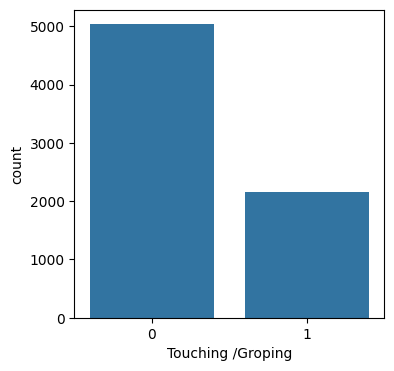

In [431]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x='Touching /Groping',data=data,ax=ax)

In [432]:
def visualize(label):
  words = ''
  for msg in data[data['Commenting'] == label]['Description']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=1600, height=800).generate(words)
  plt.figure( figsize=(20,10) )
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

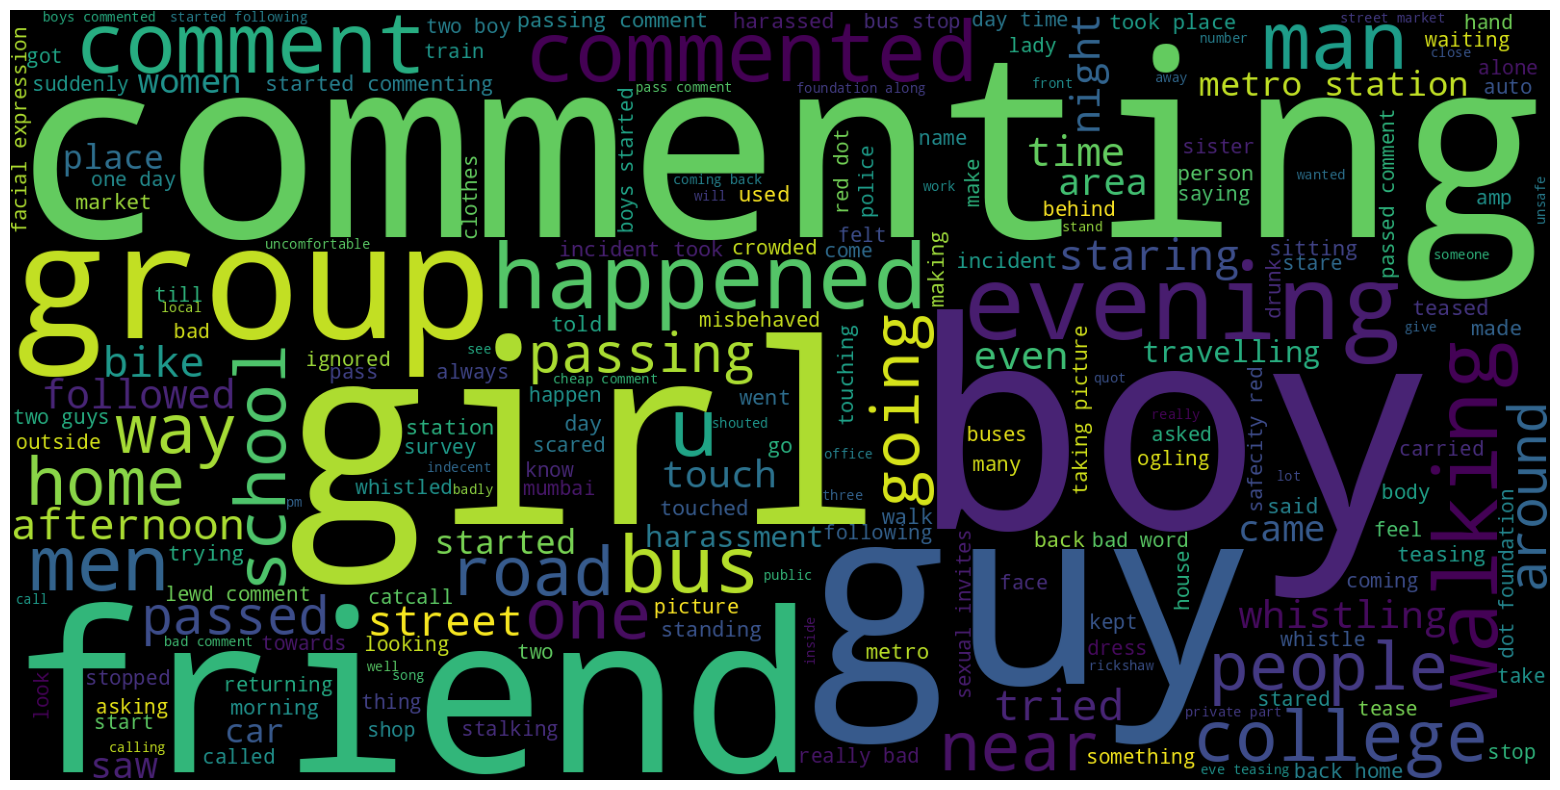

In [433]:
visualize(1)



In [434]:
def visualize(label):
  words = ''
  for msg in data[data['Ogling/Facial Expressions/Staring'] == label]['Description']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=1600, height=800).generate(words)
  plt.figure( figsize=(20,10) )
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

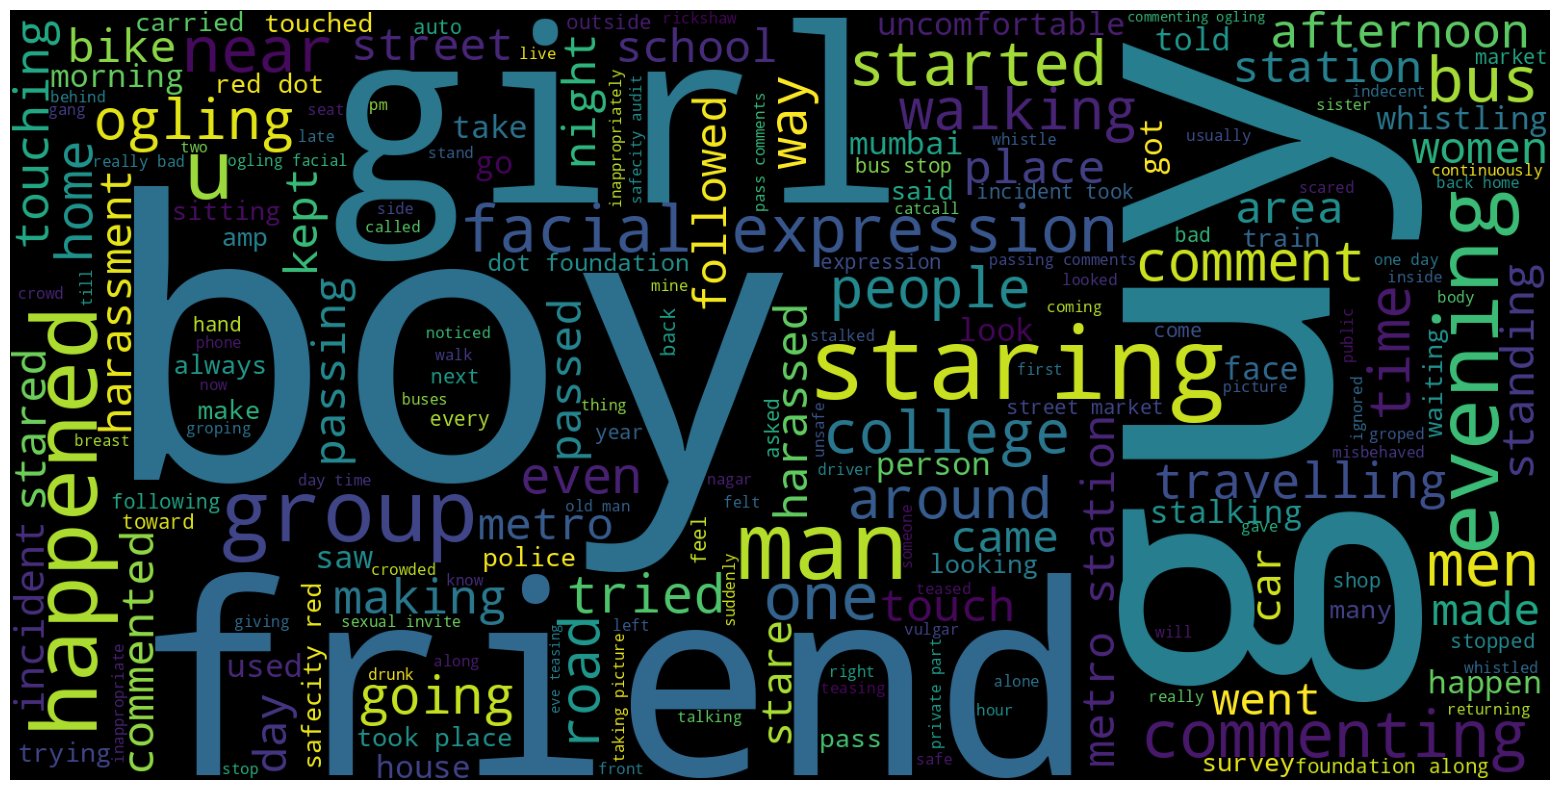

In [435]:
visualize(1)


In [436]:
def visualize(label):
  words = ''
  for msg in data[data['Touching /Groping'] == label]['Description']:
    msg = msg.lower()
    words += msg + ' '
  wordcloud = WordCloud(width=1600, height=800).generate(words)
  plt.figure( figsize=(20,10) )
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

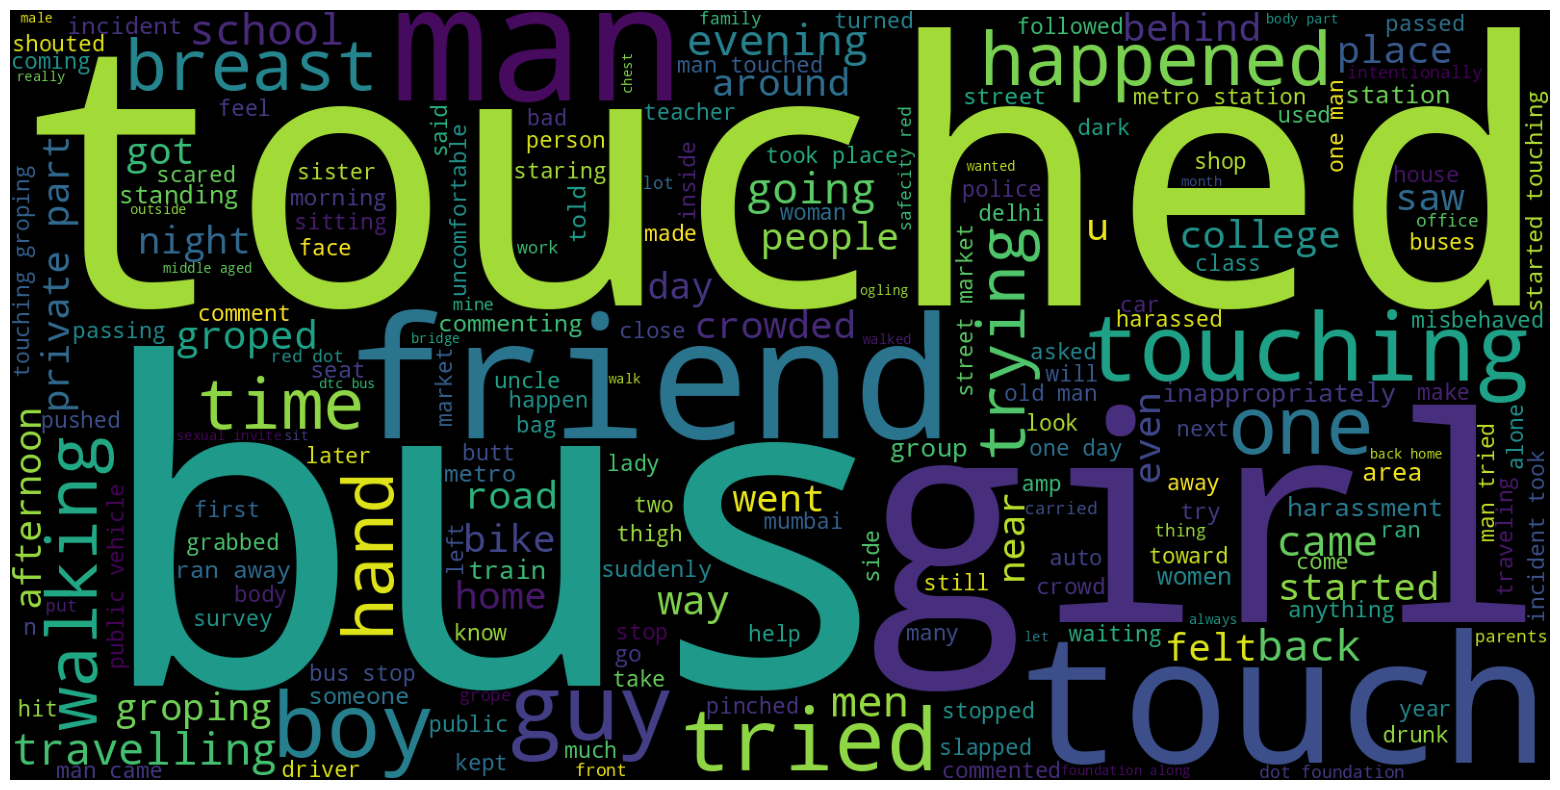

In [437]:
visualize(1)


# **Implementing Classification**

In [521]:
data

,Description,Commenting,Ogling/Facial Expressions/Staring,Touching /Groping,Clean_Description
0,"Was walking along crowded street, holding mums...",0,0,1,"walking along crowded street, holding mums han..."
1,This incident took place in the evening.I was ...,0,1,0,incident took place evening.i metro two guys s...
2,I WAS WAITING FOR THE BUS. A MAN CAME ON A BIK...,1,0,0,waiting bus. man came bike offering liftvto yo...
3,Incident happened inside the train,0,0,0,incident happened inside train
4,I witnessed an incident when a chain was bruta...,0,0,0,witnessed incident chain brutally snatched eld...
...,...,...,...,...,...
7196,There was this person near a construction site...,0,1,0,"person near construction site, probably labore..."
7197,He threatened me by making inappropriate conve...,1,0,0,threatened making inappropriate conversation.(...
7198,happened during morning at university metro st...,1,0,0,happened morning university metro station. guy...
7199,one day my aunt was returniec frm office .. sh...,0,0,0,one day aunt returniec frm office .. shaunt e ...


In [438]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import hamming_loss




In [439]:


X = data["Description"]
y = np.asarray(data[data.columns[1:4]])

vectorizer = TfidfVectorizer(max_features=3500, max_df=0.9)
vectorizer.fit(X)

TfidfVectorizer(max_df=0.9, max_features=3500)

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2362, random_state=101)

X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [573]:


clf = MultiOutputClassifier(LogisticRegression()).fit(X_train_tfidf, y_train)

In [576]:
prediction = clf.predict(X_test_tfidf)
prediction=np.array(prediction)

df = pd.DataFrame(prediction)
df.to_csv('predictions.csv', index=False)




In [556]:
y_test = test[['Commenting','Ogling/Facial Expressions/Staring','Touching /Groping']]
from sklearn.metrics import roc_auc_score, accuracy_score
score = roc_auc_score(prediction,y_test)
print(score)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.4869336962623166
0.2328042328042328


In [560]:
from sklearn.metrics import hamming_loss
ham = hamming_loss(y_test, prediction)
print('The hamming loss is:{}'.format(ham))
print('The hamming score is: ',1-(ham))

The hamming loss is:0.37095825984714875
The hamming score is:  0.6290417401528512


In [443]:
prediction[1]

array([0, 0, 0])

In [444]:
y_test[1]

array([0, 0, 0])

In [445]:
print('Hamming Loss: ', round(hamming_loss(y_test, prediction),2))

Hamming Loss:  0.16


# SHAP

In [469]:
!pip install shap

In [506]:
import shap
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
y_train=data["Commenting"]
y_train = y_train[:X_train.shape[0]]

In [507]:
clf = make_pipeline(TfidfVectorizer(max_df=0.9, max_features=3500, stop_words='english'),
                     LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr'))

In [508]:
y_train = y_train.ravel()
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.9, max_features=3500,
                                 stop_words='english')),
                ('logisticregression', LogisticRegression(multi_class='ovr'))])

In [520]:
import shap

# Extract the LogisticRegression classifier from the pipeline
logistic_regression = clf.named_steps["logisticregression"]

# Instantiate the LogisticRegression classifier
logistic_regression = LogisticRegression(multi_class='ovr')
y_train = y_train.astype(int)

logistic_regression.fit(X_train, y_train)

# Initialize a SHAP explainer with the LogisticRegression classifier and the training data
explainer = shap.KernelExplainer(lambda x: logistic_regression.predict_proba(x), X_train)
# Compute SHAP values for the first 10 instances in the test set
shap_values = explainer.shap_values(X_test_tfidf[:10])

# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test_tfidf[:10], feature_names=feature_names)

ValueError: could not convert string to float: 'catcalls'

In [ ]:
from sklearn.pipeline import Pipeline

# Extract the LogisticRegression classifier from the pipeline
logistic_regression = clf.named_steps["logisticregression"]

# Initialize a SHAP explainer with the LogisticRegression classifier and the training data
explainer = shap.Explainer(logistic_regression, X_train)

# Compute SHAP values for the first 10 instances in the test set
shap_values = explainer.shap_values(X_test_tfidf[:10])

# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test_tfidf[:10], feature_names=feature_names)

In [486]:
clf = clf.steps[-1][1]

AttributeError: 'MultiOutputClassifier' object has no attribute 'steps'

In [479]:
for i in range(clf.n_outputs_):
    explainer = shap.DeepExplainer(clf.estimators_[i][1], background_data)
    shap_values = explainer.shap_values(X_train_tfidf)

    # You can now visualize the SHAP values using various methods provided by SHAP library
    shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_train_tfidf[0])
    shap.summary_plot(shap_values, X_train_tfidf, feature_perturbation="interventional")

AttributeError: 'MultiOutputClassifier' object has no attribute 'n_outputs_'

In [472]:
import shap
from shap.explainers import MultiOutputClassifier
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = MultiOutputClassifier(clf)

shap_values = explainer.shap_values(X_test)

ImportError: cannot import name 'MultiOutputClassifier' from 'shap.explainers' (/usr/local/lib/python3.10/dist-packages/shap/explainers/__init__.py)

In [463]:
import shap
from shap.maskers import Independent

shap.initjs()
print(X_train.shape)

masker = Independent(data=X_train)
explainer = shap.Explainer(clf.predict, masker=masker)
explainer._last_mask = np.zeros(explainer.data.shape[0], dtype=bool)

shap_values_train = explainer.shap_values(X_train)
shap_values_test = explainer.shap_values(X_test_tfidf)
shap.summary_plot(shap_values_train, X_train)
shap.summary_plot(shap_values_test, X_test_tfidf)

(5760,)


IndexError: tuple index out of range